импорт всех нужных библиотек

In [1]:
import torch
import sys
import os
from model import QuantumTrainer,QuantumNeuralNetwork
import numpy as np

import matplotlib.pyplot as plt
#путь к корню директории
BASE_DIR = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(os.path.abspath(BASE_DIR))
from data_preparation import PreparationDataset
from show_analysis import LossVisualizer
from model_history import ModelHistory

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


Загрузка и подготовка данных для анализа и обучения модели.<br>
разбиение на train,test


In [2]:
path = BASE_DIR + '\data_all'  # Путь к данным
PD = PreparationDataset(path)

# параметры подготовки данных
pd_params = (10,9,50,1)
window_size,num_features,downsample_step,target_window_size = pd_params 

# Подготовка данных
X, y, df = PD.vec_to_vec(
    window_size,
    num_features,
    downsample_step,
    target_window_size,
    device=device  
)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = PD.PDtrain_test_split(
    X, y, test_size=0.33, random_state=42
)

In [3]:
#инициализация модели
hidden_size = 64
num_bands = 3
model = QuantumNeuralNetwork( 
    input_size = X_train.shape[1], # window_size*num_features - 1
    output_size = target_window_size,
    hidden_size = hidden_size,
    num_bands = num_bands,
    device = device)

lr = 0.001
trainer = QuantumTrainer(
    model=model,
    learning_rate=lr,
    inf_per_epoch = 10,
    device= device
)

In [4]:
batch_size = 32
history = trainer.fit(
    X=X_train,
    y=y_train,
    X_t=X_test,
    y_t=y_test,
    batch_size=batch_size,
    epochs=200,
    loss_tube=5
)

Epoch 10
Train - Total: 0.512121, Main: 0.482058, Quantum: 0.486699, MAPE: 0.207767, Alpha: 0.617704
Test - MAPE: 0.179857, Tube: 0.246922
Epoch 20
Train - Total: 0.364392, Main: 0.336249, Quantum: 0.482800, MAPE: 0.161212, Alpha: 0.582881
Test - MAPE: 0.097361, Tube: 0.318637
Epoch 30
Train - Total: 0.301617, Main: 0.273982, Quantum: 0.486699, MAPE: 0.130698, Alpha: 0.567807
Test - MAPE: 0.220179, Tube: 0.000000
Epoch 40
Train - Total: 0.278906, Main: 0.250931, Quantum: 0.497651, MAPE: 0.120973, Alpha: 0.562144
Test - MAPE: 0.062609, Tube: 0.523762
Epoch 50
Train - Total: 0.346357, Main: 0.317018, Quantum: 0.507410, MAPE: 0.155846, Alpha: 0.578212
Test - MAPE: 0.104733, Tube: 0.437303
Epoch 60
Train - Total: 0.218004, Main: 0.190231, Quantum: 0.507410, MAPE: 0.089878, Alpha: 0.547358
Test - MAPE: 0.050991, Tube: 0.605926
Epoch 70
Train - Total: 0.199357, Main: 0.171814, Quantum: 0.507410, MAPE: 0.079323, Alpha: 0.542811
Test - MAPE: 0.050152, Tube: 0.539794
Epoch 80
Train - Total: 0.2

In [5]:
model.training = False
#model.load_state_dict(torch.load('best_model_weights.pth'))


In [6]:
MH = ModelHistory(history)
MH.save_history_json(filename = BASE_DIR+'\loss_history/all_loss.json',model_name = 'QUANT')

In [7]:
key = MH.add_result(
        filename = BASE_DIR+'\\resualt/main.json',
        model_name = 'QUANT',
        result = 'best',
        message = 'тестовое обучение',
        params = {'hidden_size': hidden_size, 'num_bands': num_bands,'lr':lr,'batch_size':batch_size}
        )
key

'070b942d-ca1f-49d5-9657-1b7611a4faf9'

In [8]:
LV = LossVisualizer(history)

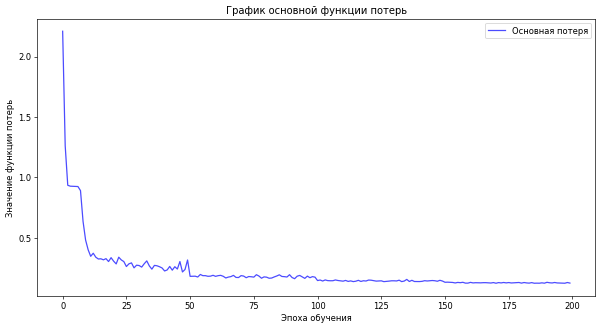

In [9]:
LV.show_training_loss()

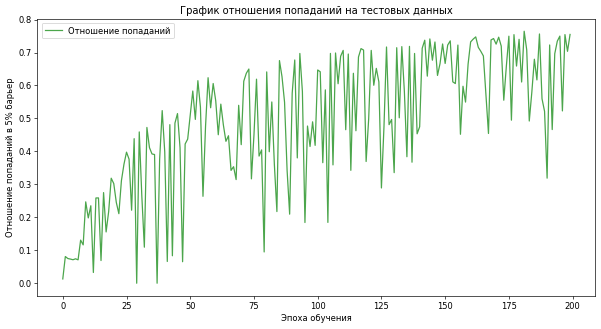

In [10]:
LV.show_test_tube()

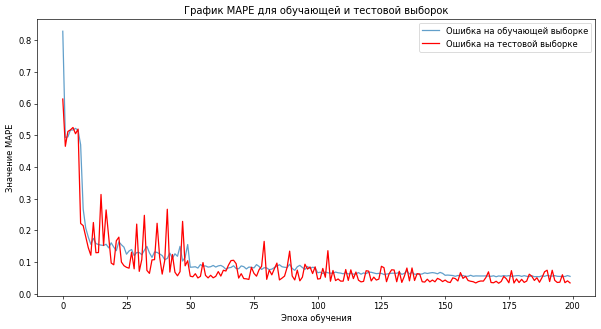

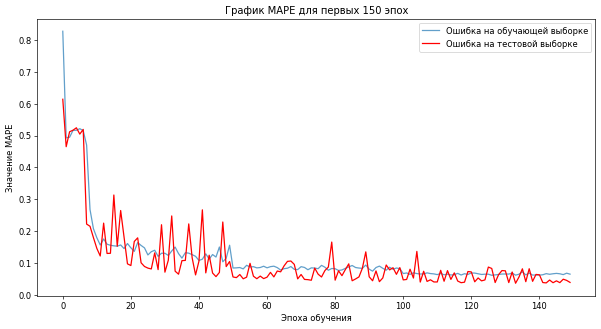

In [11]:
LV.show_mape()

In [12]:
model.load_state_dict(torch.load('best_model_weights.pth'))

<All keys matched successfully>

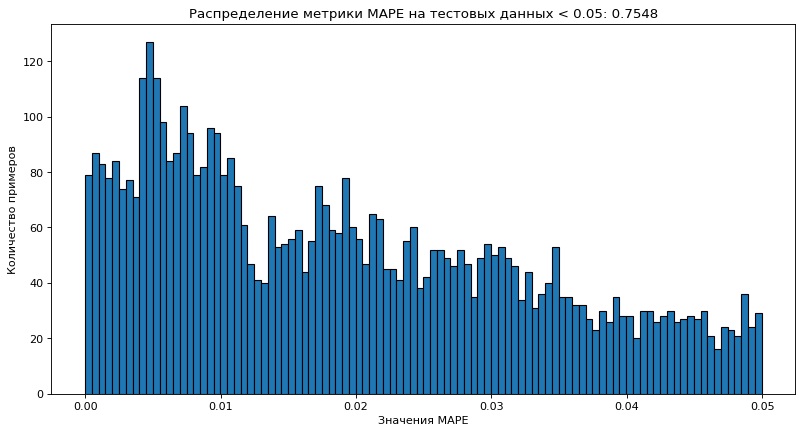

Процент значений MAPE < 0.05: 0.7548


In [14]:
LV.histogram_mape(model,X_test,y_test,limit_percel = 5)

Количество записей: 5334


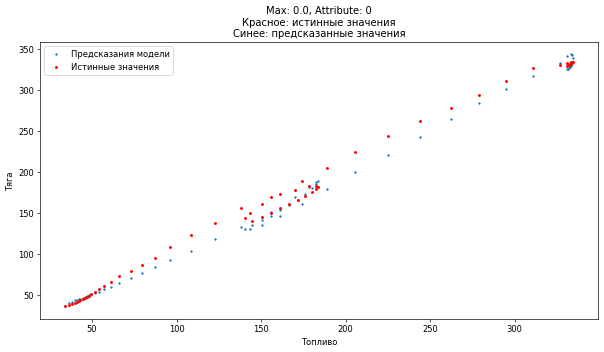

Количество записей: 5334


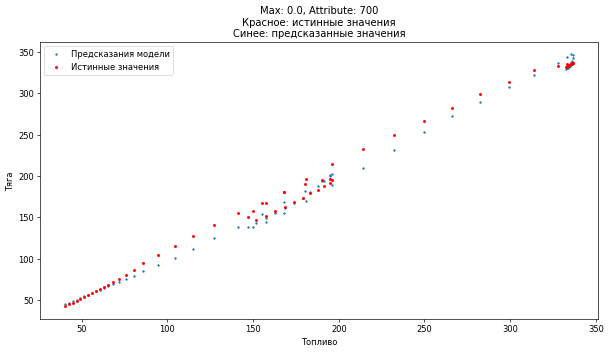

Количество записей: 5334


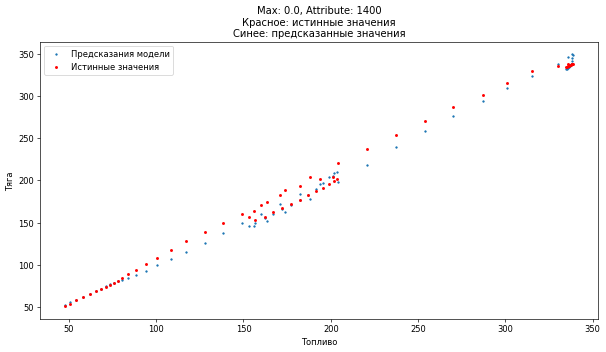

Количество записей: 5334


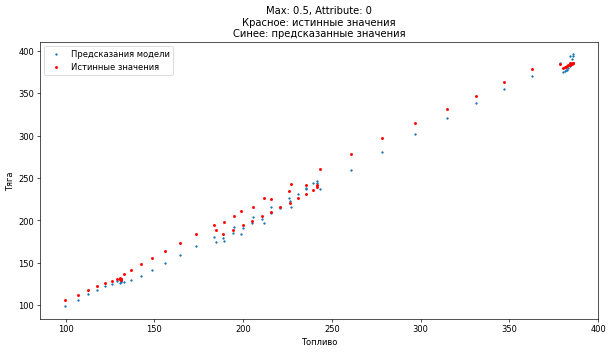

Количество записей: 5334


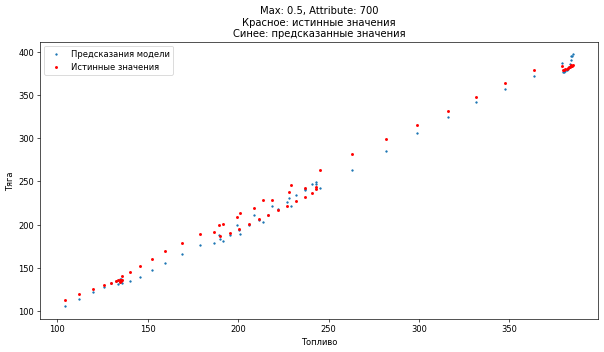

Количество записей: 5334


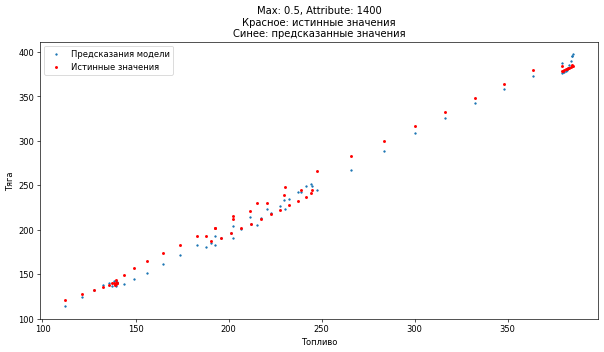

Количество записей: 5334


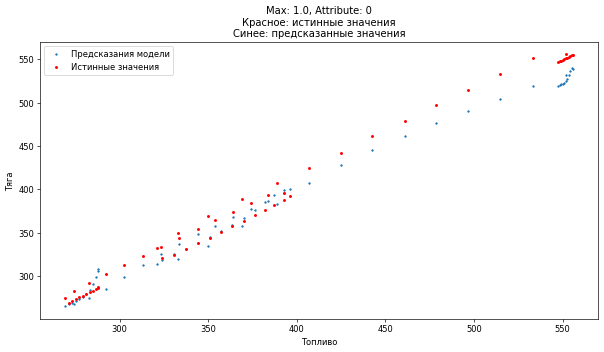

Количество записей: 5334


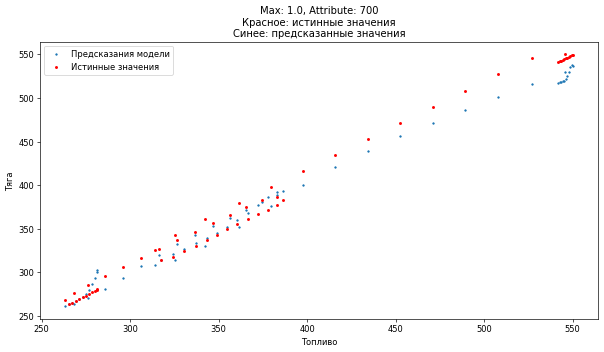

Количество записей: 5334


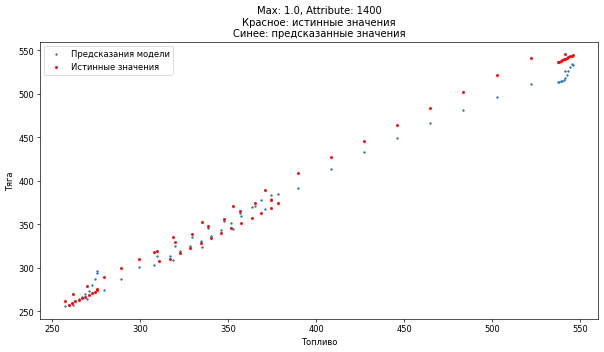

In [15]:
LV.show_predictions(model,df,pd_params,keras = False,device = device)

Анализ параметров

In [ ]:
LV.show_weight(model)

Архитектура модели 

In [18]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'  # Укажите ваш путь

In [19]:
from torchviz import make_dot

model.training = False
y = model(X_test)

# Визуализация графа
make_dot(y, params=dict(model.named_parameters())).render("model", format="png")

'model.png'